In [52]:
import cProfile
import pstats
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer

In [34]:
from kmeans_np_nx import k_means_numpy
from kmeans_python import k_means
from kmeans_cython import k_means_cython

In [35]:
import time
import numpy as np
from memory_profiler import memory_usage

def profile_function(func, *args):
    start_time = time.time()
    mem_usage = memory_usage((func, args), interval=0.1)
    execution_time = time.time() - start_time
    print(f"{func.__name__} took {execution_time:.4f} seconds and used {max(mem_usage):.2f} MiB of memory")
    return func(*args)

# Test data setup
data = np.random.rand(1000, 2)  # A simple dataset of 1000 points in 2 dimensions
k = 3  # Number of clusters

# Convert data to list for Pure Python version, if necessary
data_list = data.tolist()

# Run and profile each version
print("Profiling Pure Python Version:")
profiled_python = profile_function(k_means, data_list, k)

print("\nProfiling Numpy Version:")
profiled_numpy = profile_function(k_means_numpy, data, k)

print("\nProfiling Cython Version:")
profiled_cython = profile_function(k_means_cython, data, k)


Profiling Pure Python Version:
k_means took 0.8089 seconds and used 34.70 MiB of memory

Profiling Numpy Version:
k_means_numpy took 1.0766 seconds and used 36.05 MiB of memory

Profiling Cython Version:
k_means_cython took 1.2617 seconds and used 36.17 MiB of memory


### cProfiler

In [36]:
%prun -s cumtime k_means(data.tolist(), k)

         380482 function calls in 0.083 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.083    0.083 {built-in method builtins.exec}
        1    0.000    0.000    0.083    0.083 <string>:1(<module>)
        1    0.000    0.000    0.083    0.083 kmeans_python.py:24(k_means)
       20    0.011    0.001    0.081    0.004 kmeans_python.py:7(assign_points_to_clusters)
    20000    0.008    0.000    0.066    0.000 kmeans_python.py:11(<listcomp>)
    60000    0.019    0.000    0.058    0.000 kmeans_python.py:3(calculate_distance)
    60120    0.018    0.000    0.039    0.000 {built-in method builtins.sum}
   180000    0.021    0.000    0.021    0.000 kmeans_python.py:5(<genexpr>)
    20000    0.002    0.000    0.002    0.000 {built-in method builtins.min}
    20000    0.001    0.000    0.001    0.000 {method 'index' of 'list' objects}
    20060    0.001    0.000    0.001    0.000 {method 'append

In [37]:
%prun -s cumtime k_means_numpy(data, k)

         1157 function calls in 0.002 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.002    0.002 {built-in method builtins.exec}
        1    0.000    0.000    0.002    0.002 <string>:1(<module>)
        1    0.000    0.000    0.002    0.002 kmeans_np_nx.py:18(k_means_numpy)
       11    0.000    0.000    0.001    0.000 kmeans_np_nx.py:8(assign_points_to_clusters_numpy)
       11    0.000    0.000    0.001    0.000 kmeans_np_nx.py:13(update_centroids_numpy)
       11    0.000    0.000    0.001    0.000 kmeans_np_nx.py:15(<listcomp>)
       11    0.000    0.000    0.001    0.000 kmeans_np_nx.py:10(<listcomp>)
       33    0.000    0.000    0.001    0.000 kmeans_np_nx.py:4(calculate_distance_numpy)
       33    0.000    0.000    0.001    0.000 {method 'mean' of 'numpy.ndarray' objects}
       33    0.000    0.000    0.000    0.000 _methods.py:101(_mean)
       78    0.000    0.000    0.000

In [38]:
%prun -s cumtime k_means_cython(data, k)

         10 function calls in 0.001 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:2979(prod)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:71(_wrapreduction)
        1    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.000    0.000 fromnumeric.py:72(<dictcomp>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 fromnumeric.py:2974(_prod_dispatcher)
        1    0.000    0.000    0.000    0.000 {method 'items' of 'dict' objects}

### Implementing timeit 
Implementing time it with specific testing parameters

In [47]:
# Capturing the timing results
timeit_result_python = %timeit -o -r 7 -n 100 k_means(data.tolist(), k)


23.5 ms ± 3.38 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
timeit_result_numpy = %timeit -o -r 7 -n 100 k_means_numpy(data, k)

1.3 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
timeit_result_cython = %timeit -o -r 7 -n 100 k_means_cython(data, k)

1.23 ms ± 81.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
# Set up for visualization
means = [timeit_result_python.average, timeit_result_numpy.average, timeit_result_cython.average]
stddevs = [timeit_result_python.stdev, timeit_result_numpy.stdev, timeit_result_cython.stdev]
labels = ['Pure Python', 'Numpy', 'Cython']

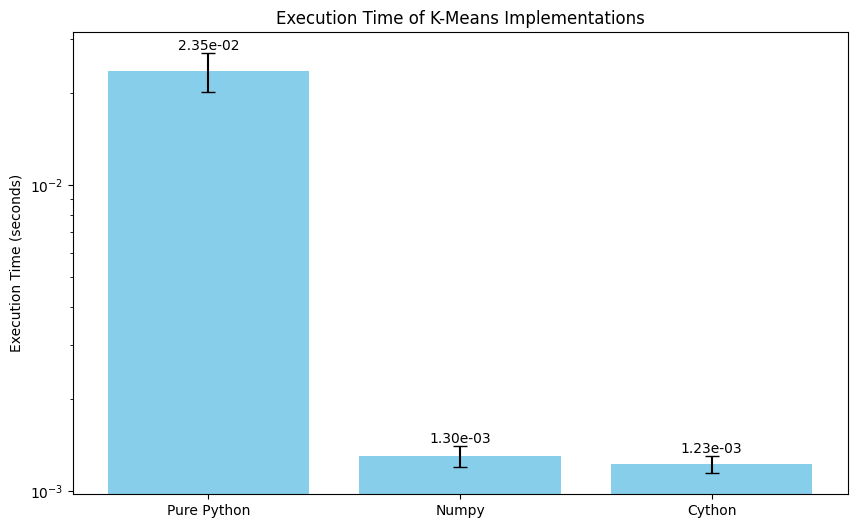

In [51]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(10, 6))
plt.bar(labels, means, yerr=stddevs, capsize=5, color='skyblue')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of K-Means Implementations')
plt.yscale('log')  # Use logarithmic scale because theres a large disparity in execution times

# Adding the mean values as text labels above each bar for clarity
for i, v in enumerate(means):
    plt.text(i, v + stddevs[i], f"{v:.2e}", ha='center', va='bottom')

plt.show()


The following evaluates the performance scalability of three K-Means clustering implementations—Pure Python, Numpy, and Cython—across different dataset sizes and dimensions. Here's a step-by-step explanation of its workflow:

1. **Parameter Setup**: It defines a range of dataset sizes (`100`, `1000`, `10000`) and dimensions (`2`, `5`, `10`), with the number of clusters fixed at `3`.

2. **Performance Measurement**:
   - For each dataset size and dimension, it generates a dataset using NumPy's random number generation.
   - It then times how long each K-Means implementation takes to process this dataset, using `%timeit` with specific options to ensure consistency (`-o`, `-r 3`, `-n 10`).

3. **Data Aggregation**:
   - The average execution times are recorded in a dictionary, indexed by the dataset size and dimensionality for easy retrieval.

4. **Visualization**:
   - Focusing on a selected dimension (`2`), the script plots the execution times against the dataset sizes for all three implementations.
   - Both axes of the plot are logarithmically scaled to better accommodate and visualize the broad range of values.
   - This plot illustrates the scalability and performance differences between the Pure Python, Numpy, and Cython implementations, providing insights into how each handles increasing data complexity.

The resulting plot serves as a visual performance comparison, highlighting how each implementation scales with data size under a constant dimensionality.


### Set up a loop to vary the dataset size and dimensionality.

In [54]:
# Example parameters to vary
dataset_sizes = [100, 1000, 10000]
dimensions = [2, 5, 10]
k = 3

results = {}

for size in dataset_sizes:
    for dim in dimensions:
        # Generate random data
        data = np.random.rand(size, dim)
        
        # Time the execution for each version
        python_time = %timeit -o -r 3 -n 10 k_means(data.tolist(), k)
        numpy_time = %timeit -o -r 3 -n 10 k_means_numpy(data, k)
        cython_time = %timeit -o -r 3 -n 10 k_means_cython(data, k)
        
        # Store the results
        results[(size, dim)] = (python_time.average, numpy_time.average, cython_time.average)

1.07 ms ± 94.1 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
The slowest run took 5.66 times longer than the fastest. This could mean that an intermediate result is being cached.
486 µs ± 415 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
225 µs ± 44.7 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
1.8 ms ± 27.6 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
340 µs ± 15.4 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
283 µs ± 6.24 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
2.87 ms ± 458 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
343 µs ± 31 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
302 µs ± 3.88 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
45.5 ms ± 4.82 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)
5.05 ms ± 1.14 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)
1.58 ms ± 260 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
69.1 ms ± 10.7 ms per loop (mean ± std. de

In [56]:
# plotting results for a specific dimension
selected_dim = 2
times_python = [result[0] for key, result in results.items() if key[1] == selected_dim]
times_numpy = [result[1] for key, result in results.items() if key[1] == selected_dim]
times_cython = [result[2] for key, result in results.items() if key[1] == selected_dim]
sizes = [key[0] for key in results.keys() if key[1] == selected_dim]


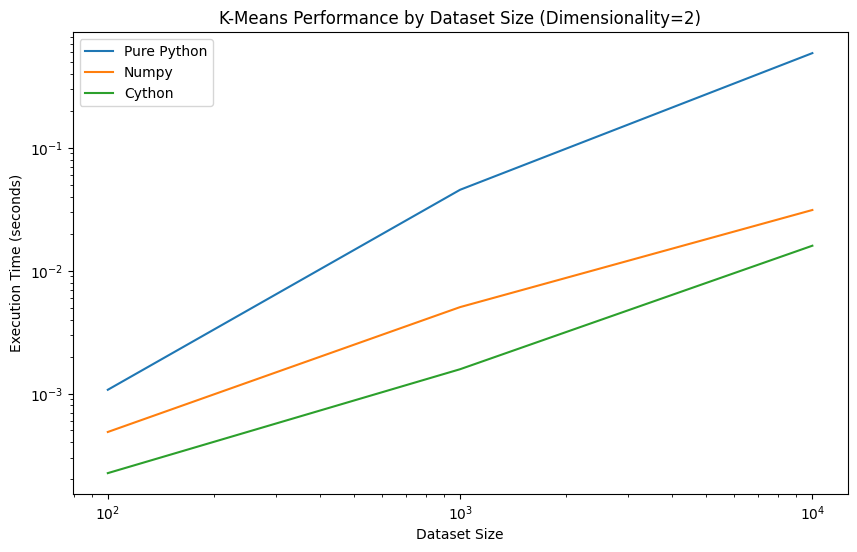

In [57]:

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_python, label='Pure Python')
plt.plot(sizes, times_numpy, label='Numpy')
plt.plot(sizes, times_cython, label='Cython')
plt.xlabel('Dataset Size')
plt.ylabel('Execution Time (seconds)')
plt.title(f'K-Means Performance by Dataset Size (Dimensionality={selected_dim})')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()